In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sb 

from datatile.summary.df import DataFrameSummary 

sns.set()

pd.options.mode.use_inf_as_na = True
# pd.set_option('')

df = pd.read_csv('data_incoming\\Data_Incoming.csv')

c:\Users\sraja\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sraja\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\sraja\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:

def generate_time_attributes ( df ):

    df['Order.Date']= pd.to_datetime(df['Order.Date'], errors='coerce')
    df['Ship.Date']=  pd.to_datetime(df['Ship.Date'] , errors='coerce')
    
    df['Days_to_Ship'] = (df['Ship.Date'] - df['Order.Date']).dt.days.astype('int16')

    df["Order_Quarter"]       = df['Order.Date'].dt.quarter

    df["Order_Month"]         = df['Order.Date'].dt.month
    df["Order_Weekday"]       = df['Order.Date'].dt.weekday
    df["Order_Day"]           = df['Order.Date'].dt.day

    df["Ship_Month"]          = df['Ship.Date'].dt.month
    df["Ship_Weekday"]        = df['Ship.Date'].dt.weekday
    df["Ship_Day"]            = df['Ship.Date'].dt.day

    df["Order_Quarter"]       = df["Order_Quarter"]     .astype('category')
    df["Order_Month"]         = df["Order_Month"]       .astype('category')
    df["Order_Weekday"]       = df["Order_Weekday"]     .astype('category')
    df["Ship_Month"]          = df["Ship_Month"]        .astype('category')
    df["Ship_Weekday"]        = df["Ship_Weekday"]      .astype('category')

    df["Order_Day_cat"]       = df["Order_Day"]         .astype('category')
    df["Ship_Day_cat"]        = df["Ship_Day"]          .astype('category')
    
    df['Year_Month'] = df['Ship.Date'].dt.year * 1000 + df['Ship.Date'].dt.month
    
    return df


df = generate_time_attributes ( df )
df

,Row.ID,Order.ID,Customer.Name,Order.Date,Order.Priority,Order.Quantity,Sales,Discount,Ship.Mode,Profit,...,Order_Quarter,Order_Month,Order_Weekday,Order_Day,Ship_Month,Ship_Weekday,Ship_Day,Order_Day_cat,Ship_Day_cat,Year_Month
0,1,3,Muhammed MacIntyre,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.25,...,4,10,2,13,10,2,20,13,20,2010010
1,2,293,Barry French,2012-01-10,High,49,10123.0200,0.07,Delivery Truck,457.81,...,1,1,1,10,2,4,10,10,10,2012002
2,3,483,Clay Rozendal,2011-10-07,High,30,4965.7595,0.08,Regular Air,1198.97,...,4,10,4,7,12,2,7,7,7,2011012
3,4,515,Carlos Soltero,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.94,...,3,8,5,28,8,0,30,28,30,2010008
4,5,613,Carl Jackson,2011-06-17,High,12,93.5400,0.03,Regular Air,-54.04,...,2,6,4,17,6,4,17,17,17,2011006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5492,47360,Frank Hawley,2010-08-10,Not Specified,25,2200.6400,0.05,Delivery Truck,-514.18,...,3,8,1,10,10,6,10,10,10,2010010
5492,5493,52706,Harry Greene,2012-09-07,Low,34,1041.6600,0.02,Express Air,480.53,...,3,9,4,7,7,0,16,7,16,2012007
5493,5494,54279,Harry Greene,2011-07-30,High,41,10071.0900,0.10,Delivery Truck,1977.69,...,3,7,5,30,7,6,31,30,31,2011007
5494,5495,55558,Mick Brown,2010-09-08,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,...,3,9,2,8,9,2,8,8,8,2010009


In [3]:
from ml_modules.plot_utils import time_plots

----

# Data Dimension Exploration

this data is essentially a fact table , 
that has 3 Key Dimensions :

- Product ( Price , Qty ) ( BUT NO Name and Descriptions)
- Customer ( ID )
- Date of Transaction and Shipping

Since there are relatively few columns , it is feasible to do a deep dive into each and eavey columnn to understand the information it captures

then we will do bivariate analyses , between numerical columns to check for correlation 


----

## Investigating Customer Loyalty : oreder-reorder behaviour



In [4]:
df

,Row.ID,Order.ID,Customer.Name,Order.Date,Order.Priority,Order.Quantity,Sales,Discount,Ship.Mode,Profit,...,Order_Quarter,Order_Month,Order_Weekday,Order_Day,Ship_Month,Ship_Weekday,Ship_Day,Order_Day_cat,Ship_Day_cat,Year_Month
0,1,3,Muhammed MacIntyre,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.25,...,4,10,2,13,10,2,20,13,20,2010010
1,2,293,Barry French,2012-01-10,High,49,10123.0200,0.07,Delivery Truck,457.81,...,1,1,1,10,2,4,10,10,10,2012002
2,3,483,Clay Rozendal,2011-10-07,High,30,4965.7595,0.08,Regular Air,1198.97,...,4,10,4,7,12,2,7,7,7,2011012
3,4,515,Carlos Soltero,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.94,...,3,8,5,28,8,0,30,28,30,2010008
4,5,613,Carl Jackson,2011-06-17,High,12,93.5400,0.03,Regular Air,-54.04,...,2,6,4,17,6,4,17,17,17,2011006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5492,47360,Frank Hawley,2010-08-10,Not Specified,25,2200.6400,0.05,Delivery Truck,-514.18,...,3,8,1,10,10,6,10,10,10,2010010
5492,5493,52706,Harry Greene,2012-09-07,Low,34,1041.6600,0.02,Express Air,480.53,...,3,9,4,7,7,0,16,7,16,2012007
5493,5494,54279,Harry Greene,2011-07-30,High,41,10071.0900,0.10,Delivery Truck,1977.69,...,3,7,5,30,7,6,31,30,31,2011007
5494,5495,55558,Mick Brown,2010-09-08,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,...,3,9,2,8,9,2,8,8,8,2010009


In [5]:
temp = df [['Order.ID','Customer.Name']].groupby('Customer.Name').nunique().sort_values('Order.ID' , ascending=False)

# temp[ temp['Invoice_No'] > 1 ]

display(temp)
temp.describe()

,Order.ID
Customer.Name,
Darren Budd,26
Brad Thomas,24
Ed Braxton,22
Jack O'Briant,21
Carlos Soltero,20
...,...
Sample Company A,1
Toby Braunhardt,1
Maria Etezadi,1


,Order.ID
count,795.000000
mean,6.913208
std,3.740818
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,26.000000


as there is repeat traffic over the 1< year period , it is worth looking into this traffic and seeing the pattern at a month level


C:\Users\sraja\AppData\Local\Temp/ipykernel_21208/1958903406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Reorder_C [df.Reorder_C > 10 ] = 10


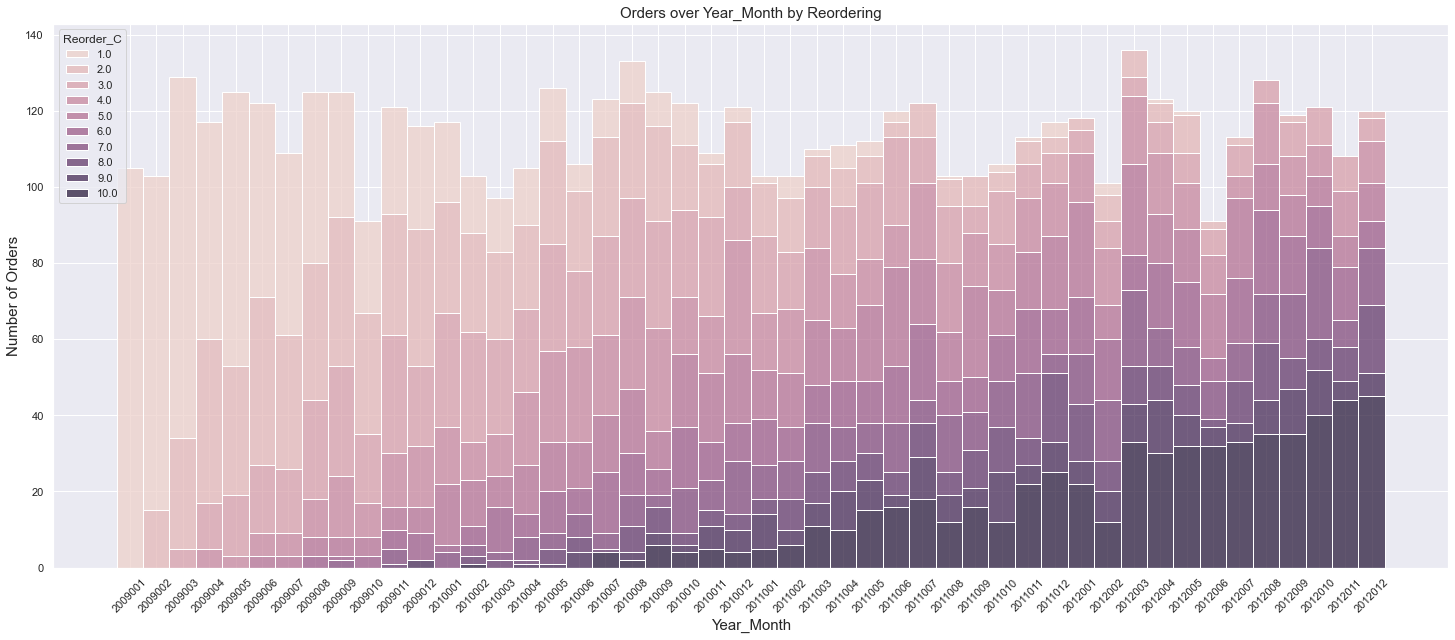

In [13]:
df['Reorder_C']=df.sort_values('Order.ID').dropna( subset=['Customer.Name'] , how='any').groupby(['Customer.Name'])['Year_Month'].rank(method='min')
df.Reorder_C [df.Reorder_C > 10 ] = 10


temp_df = df[['Year_Month','Reorder_C','Order.ID']].drop_duplicates().astype({'Year_Month':'str'}).sort_values('Year_Month')

sns.set(rc = {'figure.figsize':(25,10)})
plt.set_cmap('turbo')
plt.rcParams['image.cmap']='turbo'
sns.set_palette(palette='turbo')

ax = sns.histplot(temp_df , x='Year_Month' , hue='Reorder_C'  , multiple="stack" , discrete=True)
ax.set_xlabel('Year_Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Orders over Year_Month by Reordering' ,fontsize=15)
plt.xticks(rotation=45)
plt.show()

C:\Users\sraja\AppData\Local\Temp/ipykernel_21208/2235341400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Reorder_C [df.Reorder_C > 10 ] = 10


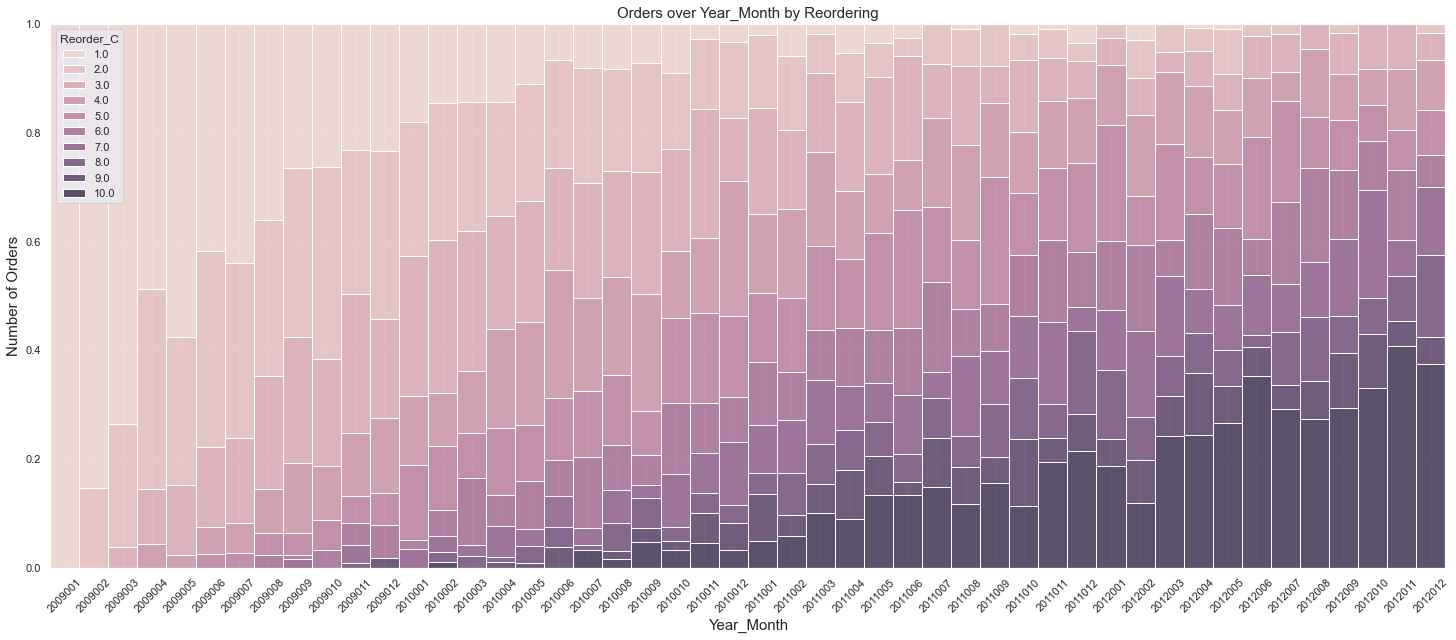

In [14]:
df['Reorder_C']=df.sort_values('Order.ID').dropna( subset=['Customer.Name'] , how='any').groupby(['Customer.Name'])['Year_Month'].rank(method='min')
df.Reorder_C [df.Reorder_C > 10 ] = 10


temp_df = df[['Year_Month','Reorder_C','Order.ID']].drop_duplicates().astype({'Year_Month':'str'}).sort_values('Year_Month')

sns.set(rc = {'figure.figsize':(25,10)})
plt.set_cmap('turbo')
plt.rcParams['image.cmap']='turbo'
sns.set_palette(palette='turbo')

ax = sns.histplot(temp_df , x='Year_Month' , hue='Reorder_C'  , multiple="fill" , discrete=True)
ax.set_xlabel('Year_Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Orders over Year_Month by Reordering' ,fontsize=15)
plt.xticks(rotation=45)
plt.show()

1 represents first time buyer

while 10 represents 10 or more previous purchases

-----

# Product Category Contribution  

Product.Category
Technology         38.285540
Furniture          34.329425
Office Supplies    27.385035
Name: Sales, dtype: float64

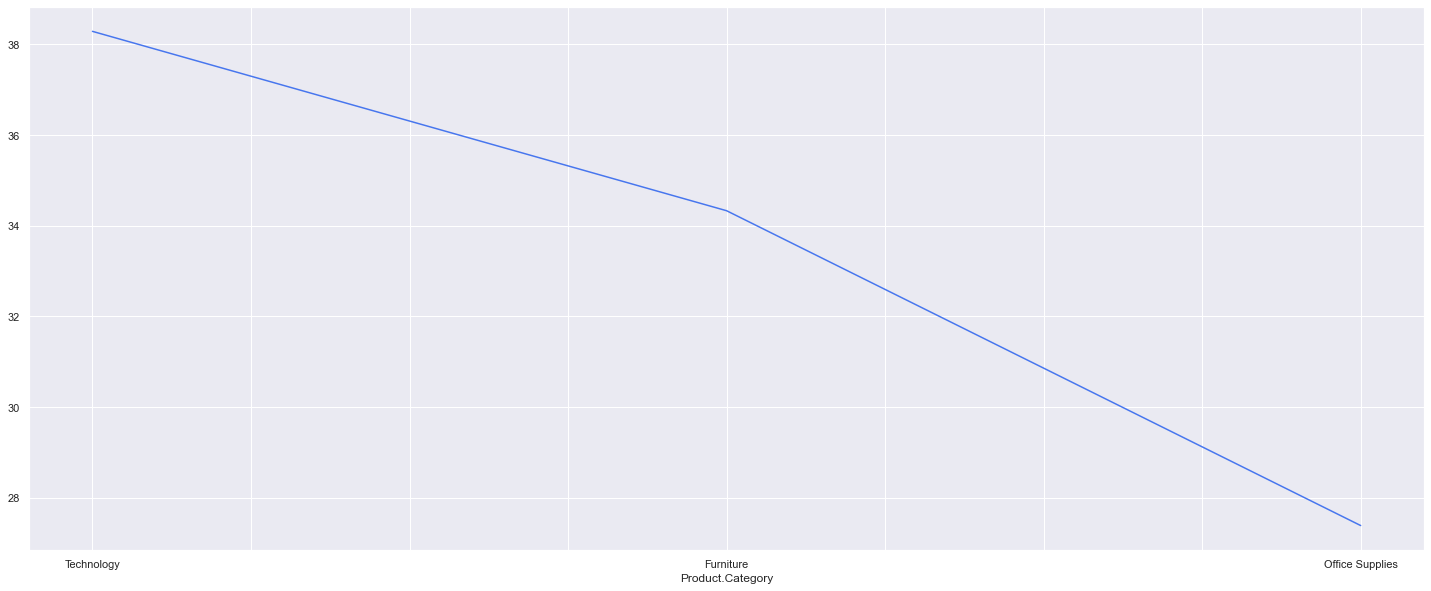

In [20]:
temp =df.groupby('Product.Category').sum()['Sales'].sort_values(ascending=False) * 100 / df.Sales.sum()

temp.plot()
temp.head(10)

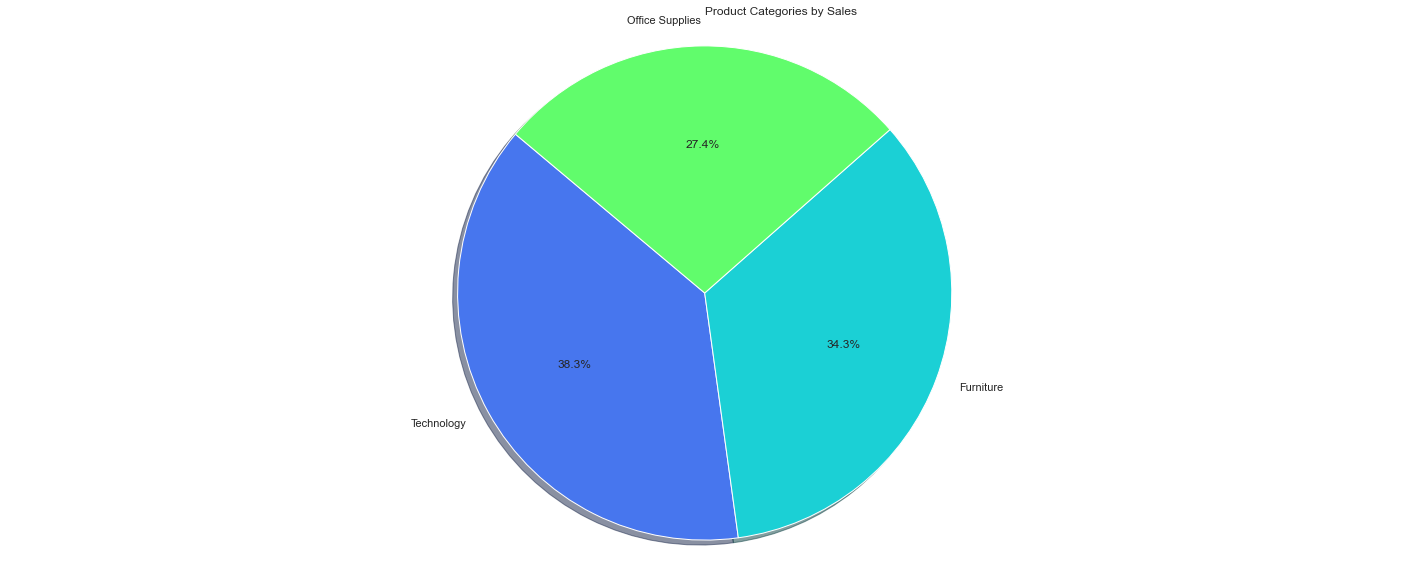

In [21]:
title = plt.title('Product Categories by Sales')
title.set_ha("left")

plt.pie(temp, labels=temp.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Product.Category
Office Supplies    53.671329
Technology         24.300699
Furniture          22.027972
Name: Return.Status, dtype: float64

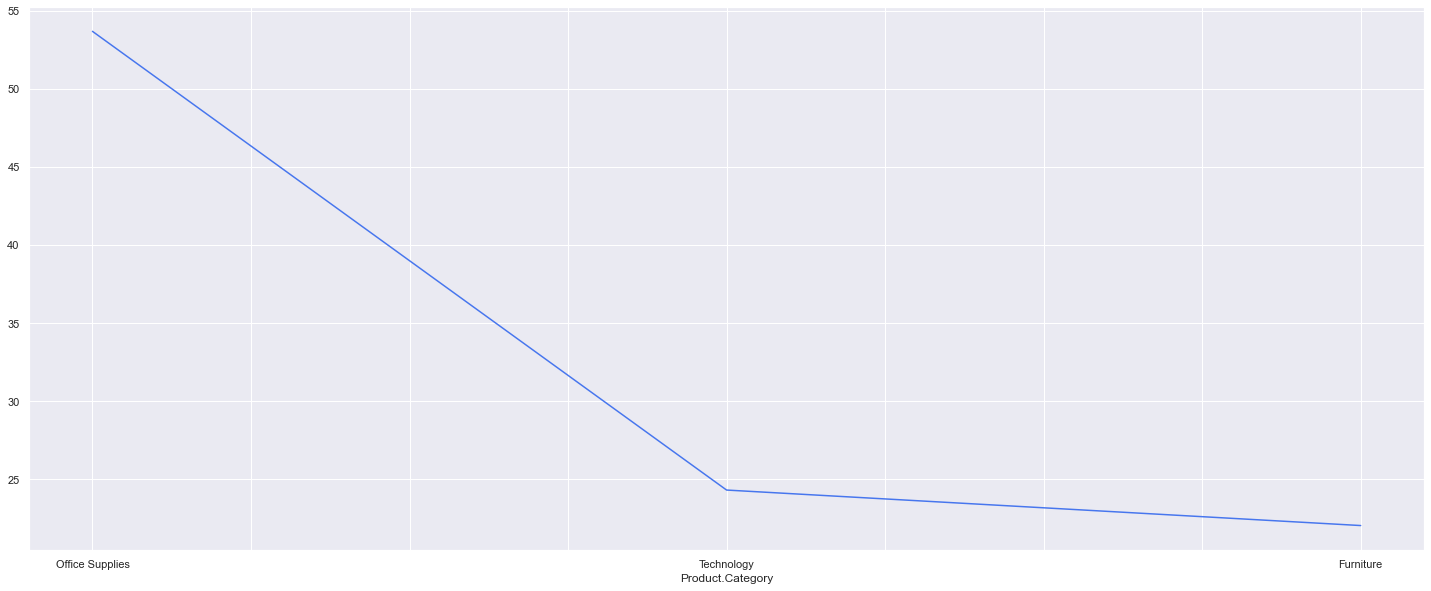

In [22]:
temp =df.groupby('Product.Category').sum()['Return.Status'].sort_values(ascending=False) * 100 / df['Return.Status'].sum()

temp.plot()
temp

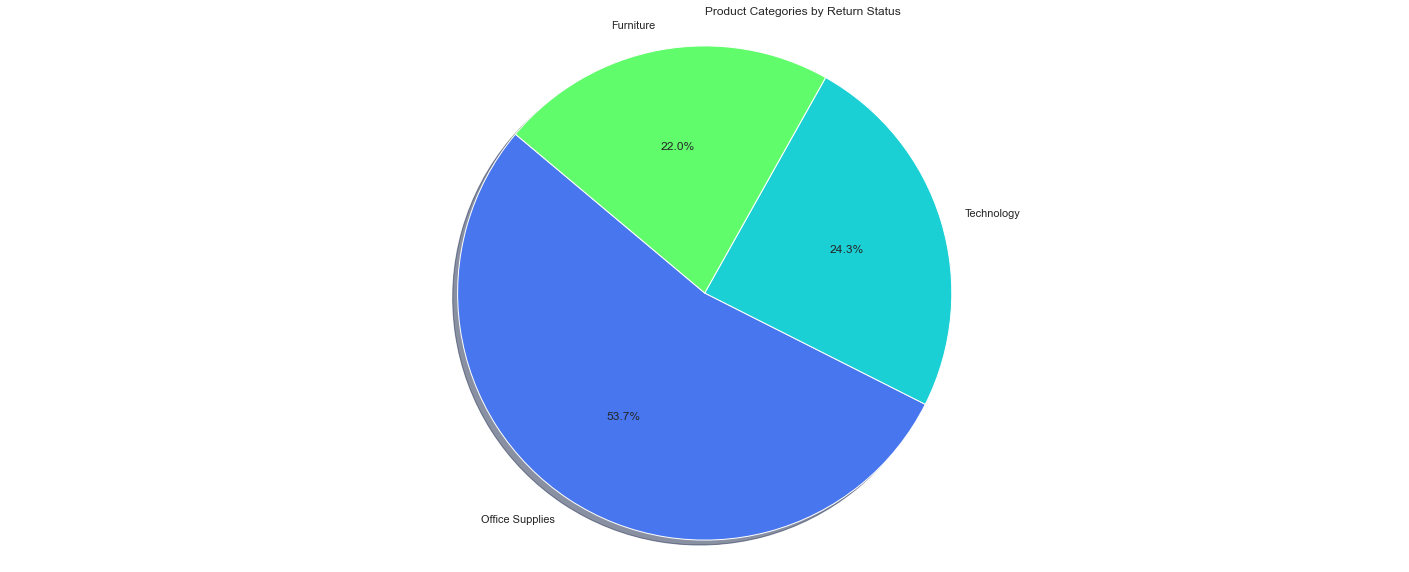

In [23]:
title = plt.title('Product Categories by Return Status')
title.set_ha("left")

plt.pie(temp, labels=temp.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# time level analysis of Transaction Count by Return Status

In [16]:
df.groupby('Return.Status').count()['Order.ID'] / len(df)

Return.Status
0    0.895924
1    0.104076
Name: Order.ID, dtype: float64

---------------------------------- Year_Month ----------------------------------


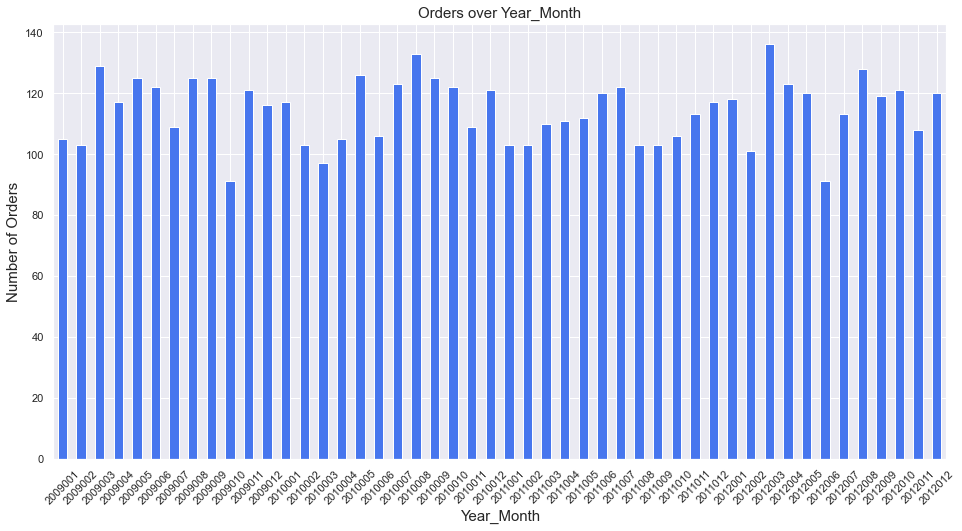

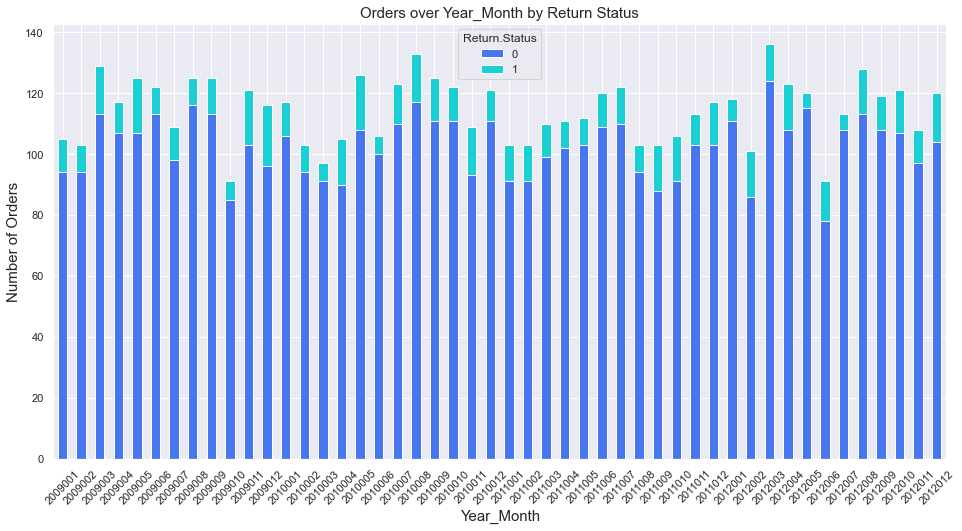

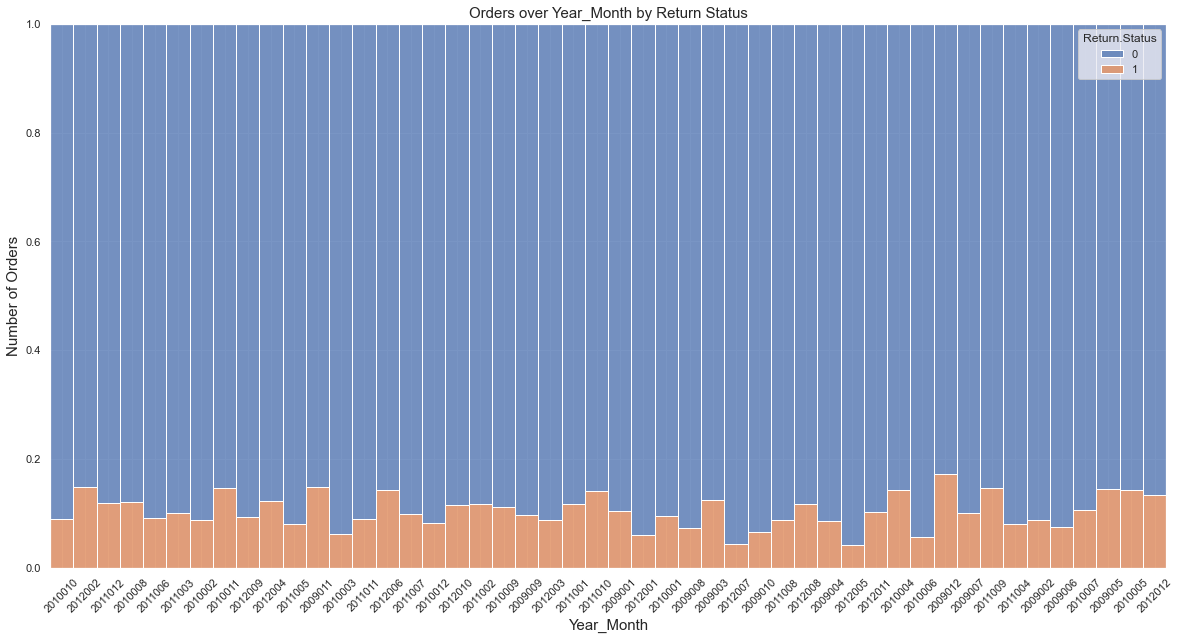

------------------------------Transaction Weekday ------------------------------


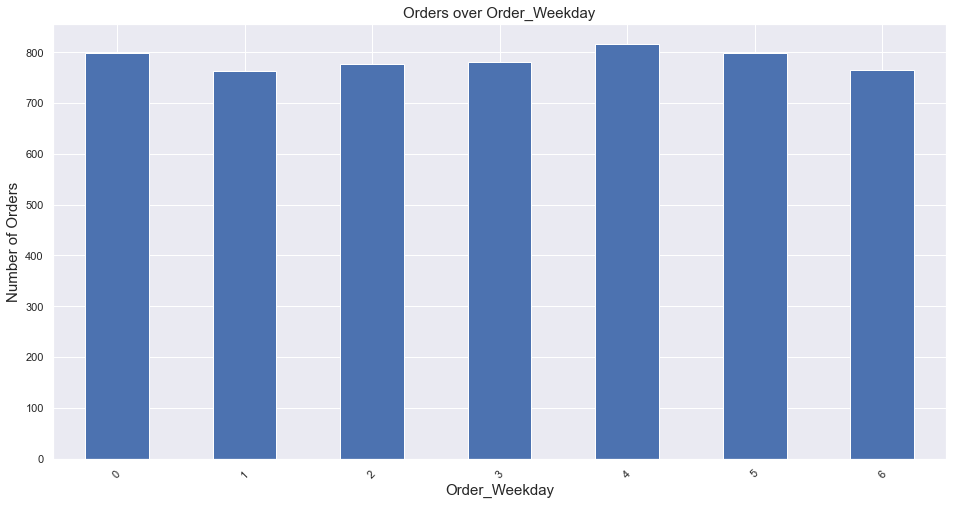

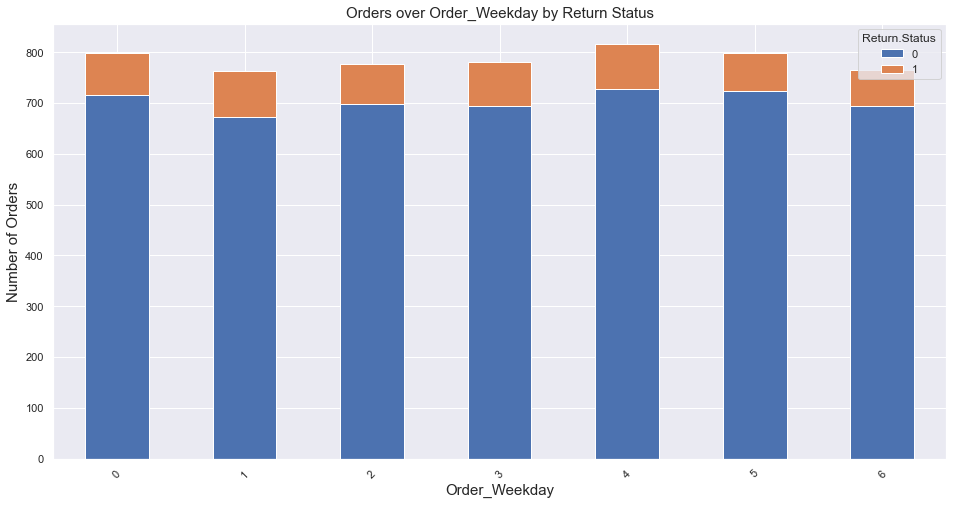

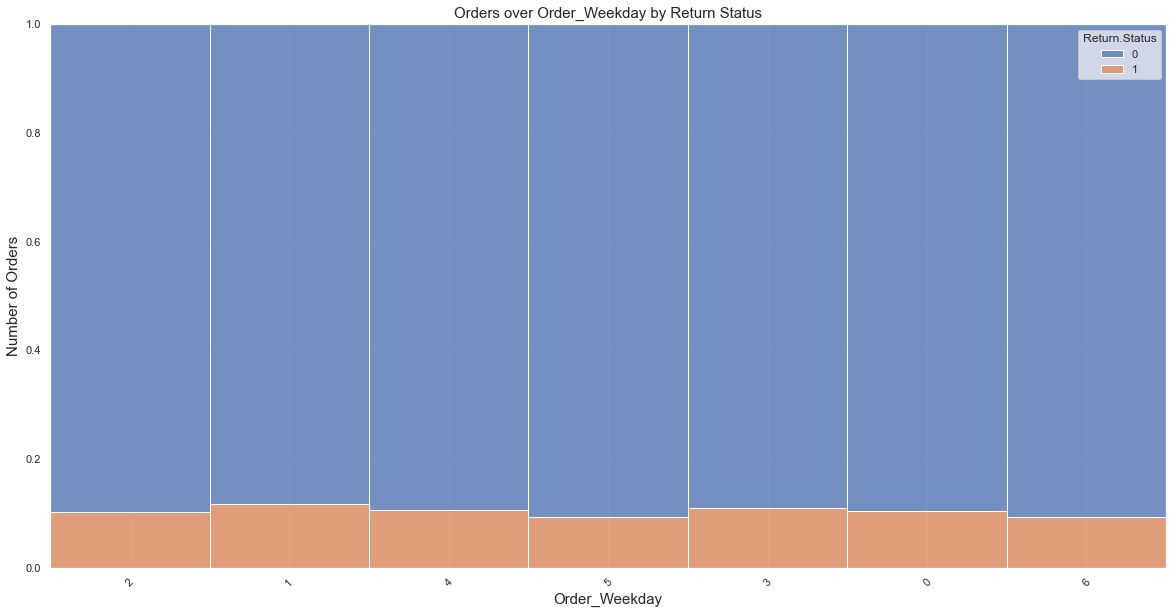

-------------------------------Shipping Weekday --------------------------------


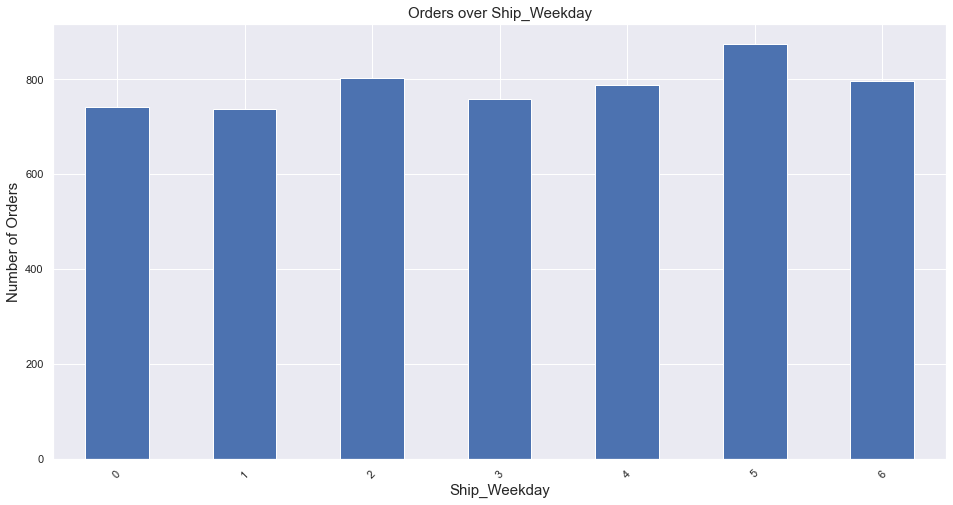

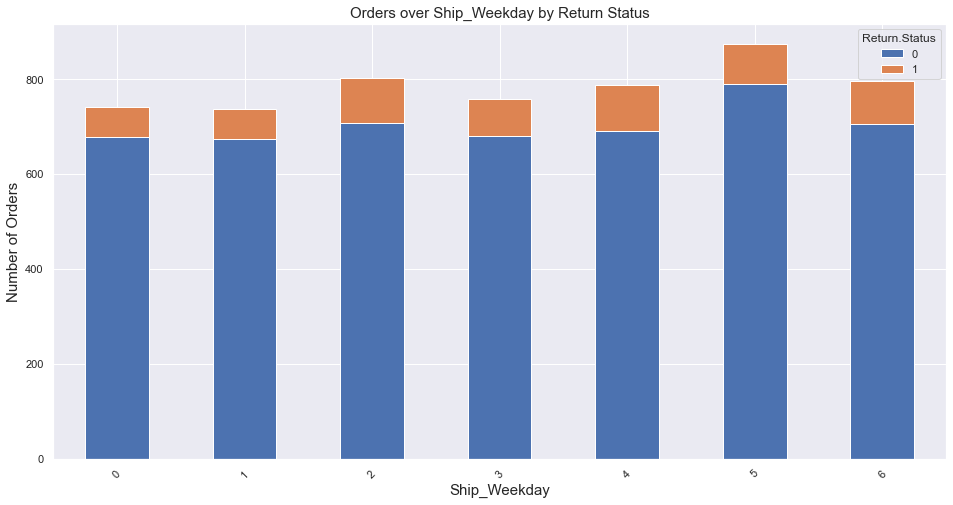

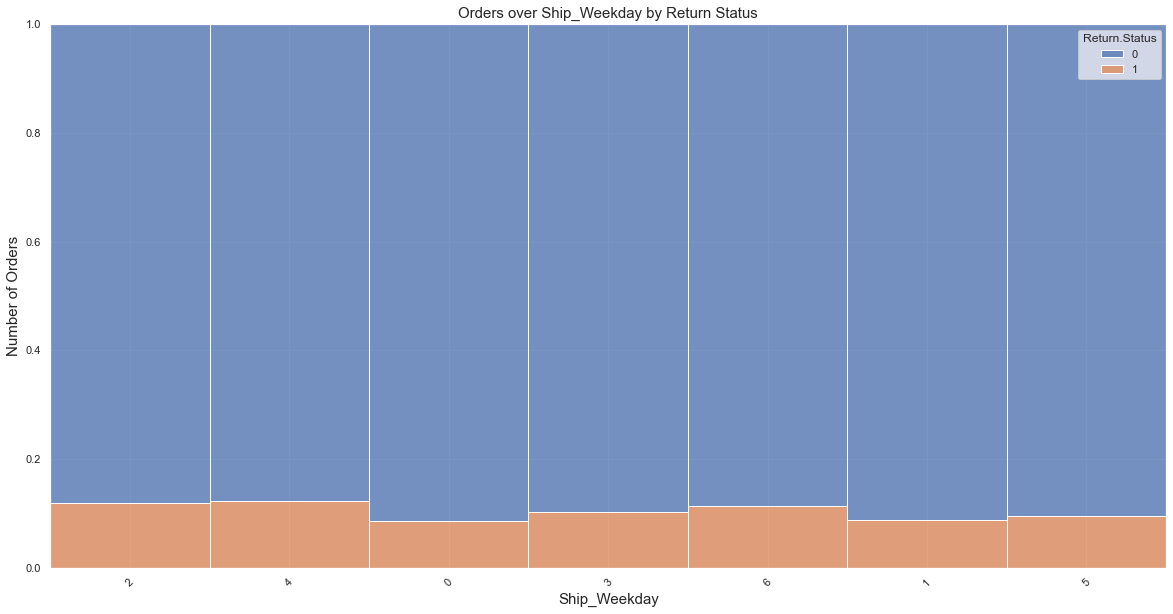

In [10]:
print(" Year_Month ".center(80,'-'))
time_plots( 'Year_Month' , df=df )

print("Transaction Weekday ".center(80,'-'))
time_plots( 'Order_Weekday' , df=df )

print("Shipping Weekday ".center(80,'-'))
time_plots( 'Ship_Weekday' , df=df )